In [1]:
import pandas as pd
file_path = '../filtered-labeled-data/classed_review_2018.csv'
data = pd.read_csv(file_path)

In [7]:
# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Extract year and month for grouping
data['year_month'] = data['time'].dt.to_period('M')

# Filter the data to include only the classes -1 and 1
filtered_data = data[data['class'].isin([-1, 1])]

# Calculate the count of each class grouped by year and month
grouped_data = filtered_data.groupby(['year_month', 'class']).size().unstack(fill_value=0)

# Calculate the ratio
grouped_data['ratio'] = grouped_data[-1] / (grouped_data[-1] + grouped_data[1])

# Reset index to make 'year_month' a column
grouped_data.reset_index(inplace=True)

# Display the processed data
grouped_data[['year_month', 'ratio']]

grouped_data = grouped_data[:-1]

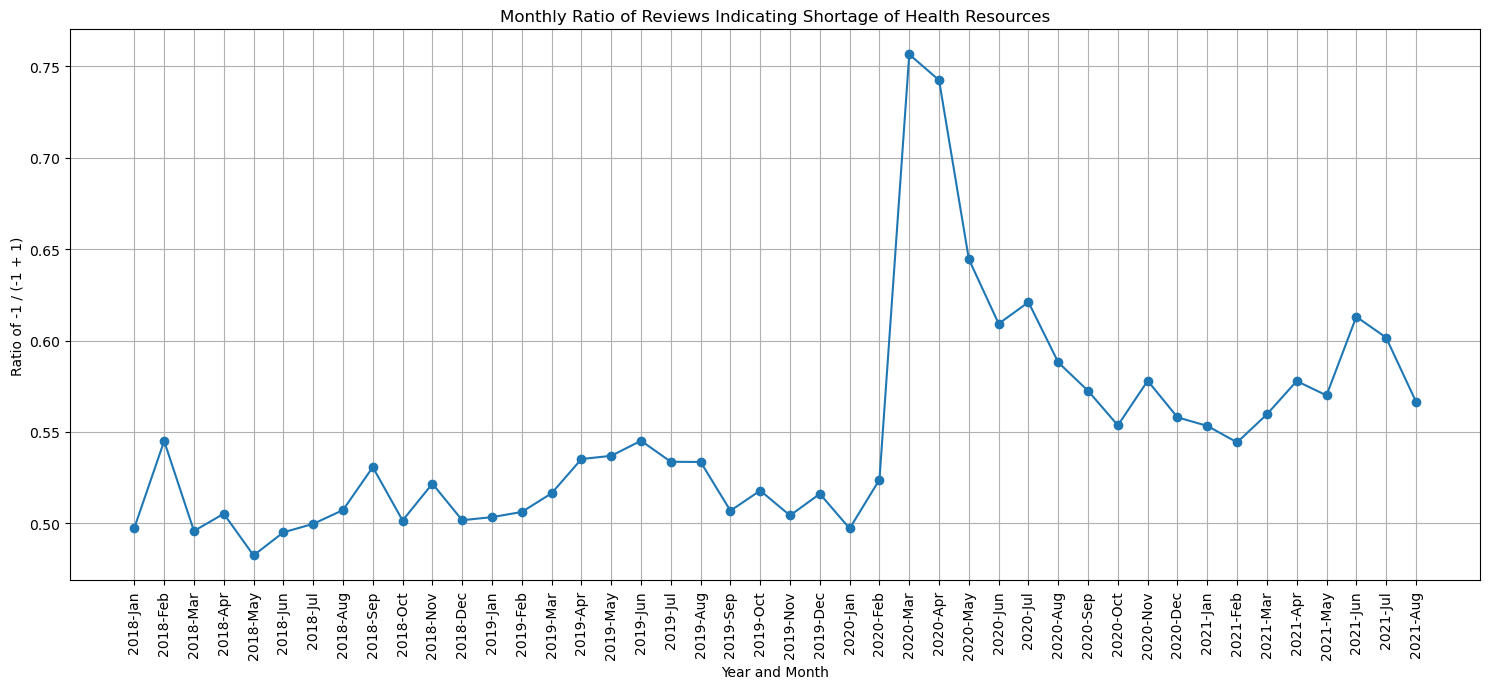

In [11]:
import matplotlib.pyplot as plt

# Convert 'year_month' to a format suitable for plotting
grouped_data['year_month_str'] = grouped_data['year_month'].dt.strftime('%Y-%b')

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(grouped_data['year_month_str'], grouped_data['ratio'], marker='o', linestyle='-')
plt.title('Monthly Ratio of Reviews Indicating Shortage of Health Resources')
plt.xlabel('Year and Month')
plt.ylabel('Ratio of -1 / (-1 + 1)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

plt.show()


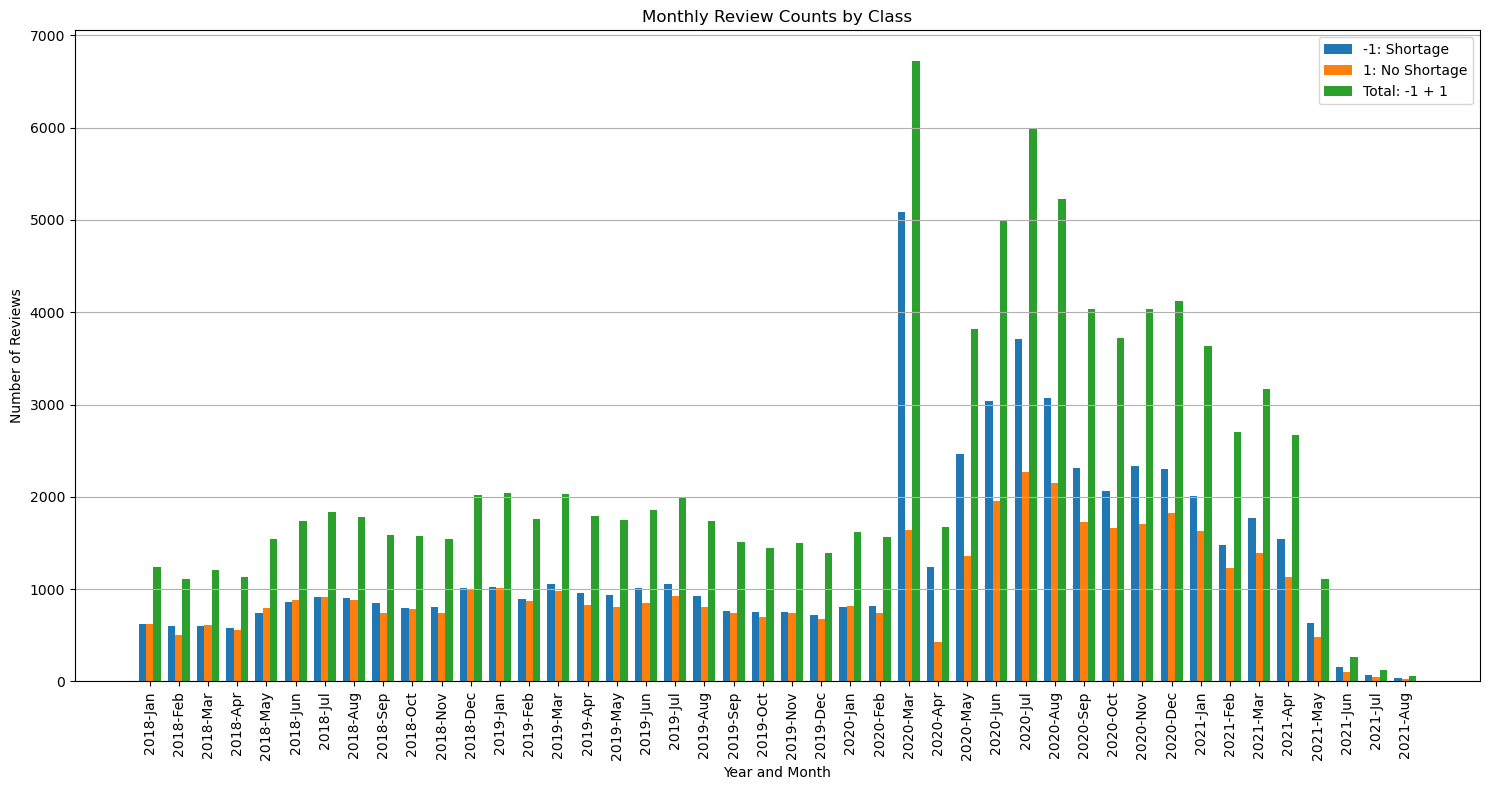

In [13]:
# Calculate the sum of -1 and 1 classes for each month
grouped_data['total'] = grouped_data[-1] + grouped_data[1]

# Assuming 'grouped_data' has columns 'year_month_str', '-1', '1', and 'total' calculated as previously mentioned
plt.figure(figsize=(15, 8))

# Create bar positions for each category
x = range(len(grouped_data['year_month_str']))  # Base positions
width = 0.25  # Width of each bar

# Plotting bars for each category
plt.bar(x, grouped_data[-1], width=width, label='-1: Shortage', align='center')
plt.bar([p + width for p in x], grouped_data[1], width=width, label='1: No Shortage', align='center')
plt.bar([p + 2*width for p in x], grouped_data['total'], width=width, label='Total: -1 + 1', align='center')

# Setting the x-axis labels to the year-month string, positioned at the center of the grouped bars
plt.xticks([p + width for p in x], grouped_data['year_month_str'], rotation=90)

plt.title('Monthly Review Counts by Class')
plt.xlabel('Year and Month')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()

